# Análisis de viajes de taxi en NYC

Los datos que usaremos para este trabajo corresponden a los viajes de taxi realizados en 2016 en la ciudad de Nueva York.

Se cuenta con 1'458,644 registros de viajes realizados, incluyendo el punto de origen, destino, hora de inicio de viaje y hora de terminacion del viaje.


## Importamos librerias

In [28]:
import pandas as pd
import numpy as np
import pylab as plt
import seaborn as sns
import matplotlib.pyplot
import datetime
import math
sns.set_style("whitegrid")
   
%matplotlib inline

Cargamos los datos

In [2]:
taxi_data = pd.read_csv('C:/Users/Rodrigo/Desktop/UP/2017-04/DataAnalisys/NYCTaxi/Data/train.csv')

In [3]:
taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null object
dropoff_datetime      1458644 non-null object
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [4]:
taxi_data.head(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443
6,id1813257,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.969017,40.757839,-73.957405,40.765896,N,341
7,id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,N,1551
8,id1301050,1,2016-05-27 23:12:23,2016-05-27 23:16:38,1,-73.999481,40.738400,-73.985786,40.732815,N,255
9,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225


## Hacemos un ETL, para crear columnas con los  datos que usaremos.

Primero disminuimos el tamaño de la base de datos en un factor de 100 porque actualmente tenemos 1,458,644 registros, con esta reeducción tendremos 10,000 registros.

1) Cambiamos el formato de pickup_datetime y de dropoff_datetime, a formato de fecha y hora.

2) Agregamos dia de la semana, numero de dia de la semana, tanto para la hora de recoger, como para la hora de dejar.

In [5]:
taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null object
dropoff_datetime      1458644 non-null object
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [6]:
taxi_data['pickup_datetime'] = pd.to_datetime(taxi_data['pickup_datetime'], format = "%Y/%m/%d %H:%M:%S")
#taxi_data['dropoff_datetime'] = pd.to_datetime(taxi_data['dropoff_datetime'], format = "%Y/%m/%d %H:%M:%S")

In [7]:
taxi_data['PickUpDayNum']=taxi_data['pickup_datetime'].dt.dayofweek
taxi_data['PickUpDayName']=taxi_data['pickup_datetime'].dt.weekday_name
#taxi_data['DropOffDayNum']=taxi_data['dropoff_datetime'].dt.dayofweek
#taxi_data['DropOffDayName']=taxi_data['dropoff_datetime'].dt.weekday_name
taxi_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,PickUpDayNum,PickUpDayName
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,0,Monday
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6,Sunday
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,1,Tuesday
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2,Wednesday
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,5,Saturday


## Continuamos con el ETL, agregamos una columna del cálculo de la distancia.

3) Hacemos el cálculo de la distancia entre el punto de origen y el punto de destino.

Hacemos un cálculo de la distancia haciendo una función haversine, que sirve para calcular distancias usando los datos de longitud y latitud.

In [8]:
def hav(row):
    lon1 = row['pickup_longitude']
    lat1 = row['pickup_latitude']
    lon2 = row['dropoff_longitude']
    lat2 = row['dropoff_latitude']
    lon1, lat1, lon2, lat2 = map(math.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a)) 
    m = 6367000 * c
    return m

taxi_data['Distance'] = taxi_data.apply(lambda row: hav(row), axis=1)

In [9]:
taxi_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,PickUpDayNum,PickUpDayName,Distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,0,Monday,1497.579941
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6,Sunday,1804.373590
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,1,Tuesday,6381.089644
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2,Wednesday,1484.565760
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,5,Saturday,1187.842210


## Terminamos el ETL 

4) Hacemos el cáluculo de la eficiencia del viaje, calculando el número de metros recorridos por segundo, a mayor número de metros por segundo, mayor eficiencia.

In [10]:
taxi_data['Eficiencia'] = taxi_data.Distance / taxi_data.trip_duration

In [11]:
taxi_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,PickUpDayNum,PickUpDayName,Distance,Eficiencia
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,0,Monday,1497.579941,3.291384
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6,Sunday,1804.373590,2.721529
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,1,Tuesday,6381.089644,3.004279
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2,Wednesday,1484.565760,3.460526
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,5,Saturday,1187.842210,2.730672


In [12]:
taxi_data['Hora'] = 1 
taxi_data

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,PickUpDayNum,PickUpDayName,Distance,Eficiencia,Hora
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,0,Monday,1497.579941,3.291384,1
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6,Sunday,1804.373590,2.721529,1
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,1,Tuesday,6381.089644,3.004279,1
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2,Wednesday,1484.565760,3.460526,1
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,5,Saturday,1187.842210,2.730672,1
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443,5,Saturday,1098.252494,2.479125,1
6,id1813257,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.969017,40.757839,-73.957405,40.765896,N,341,4,Friday,1325.445880,3.886938,1
7,id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,N,1551,5,Saturday,5711.392509,3.682394,1
8,id1301050,1,2016-05-27 23:12:23,2016-05-27 23:16:38,1,-73.999481,40.738400,-73.985786,40.732815,N,255,4,Friday,1309.530584,5.135414,1
9,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,3,Thursday,5117.946267,4.177915,1


In [13]:
td=taxi_data.iloc[1:10001]

In [16]:
td.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,PickUpDayNum,PickUpDayName,Distance,Eficiencia,Hora
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6,Sunday,1804.373590,2.721529,1
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,1,Tuesday,6381.089644,3.004279,1
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2,Wednesday,1484.565760,3.460526,1
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,5,Saturday,1187.842210,2.730672,1
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443,5,Saturday,1098.252494,2.479125,1


In [17]:
for i in range(10000):
    td['Hora'].iloc[i] = td['pickup_datetime'].iloc[i].hour

C:\Users\Rodrigo\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Rodrigo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [18]:
td.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,PickUpDayNum,PickUpDayName,Distance,Eficiencia,Hora
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6,Sunday,1804.373590,2.721529,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,1,Tuesday,6381.089644,3.004279,11
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2,Wednesday,1484.565760,3.460526,19
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,5,Saturday,1187.842210,2.730672,13
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443,5,Saturday,1098.252494,2.479125,22


### Seleccionamos los primeros 10,000 registros

In [19]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 1 to 10000
Data columns (total 16 columns):
id                    10000 non-null object
vendor_id             10000 non-null int64
pickup_datetime       10000 non-null datetime64[ns]
dropoff_datetime      10000 non-null object
passenger_count       10000 non-null int64
pickup_longitude      10000 non-null float64
pickup_latitude       10000 non-null float64
dropoff_longitude     10000 non-null float64
dropoff_latitude      10000 non-null float64
store_and_fwd_flag    10000 non-null object
trip_duration         10000 non-null int64
PickUpDayNum          10000 non-null int64
PickUpDayName         10000 non-null object
Distance              10000 non-null float64
Eficiencia            10000 non-null float64
Hora                  10000 non-null int64
dtypes: datetime64[ns](1), float64(6), int64(5), object(4)
memory usage: 1.2+ MB


Con esto terminamos nuestro ETL

## Iniciamos con el despliegue de la información de los viajes.

Text(0.5,1,'Número de viajes por día de la semana')

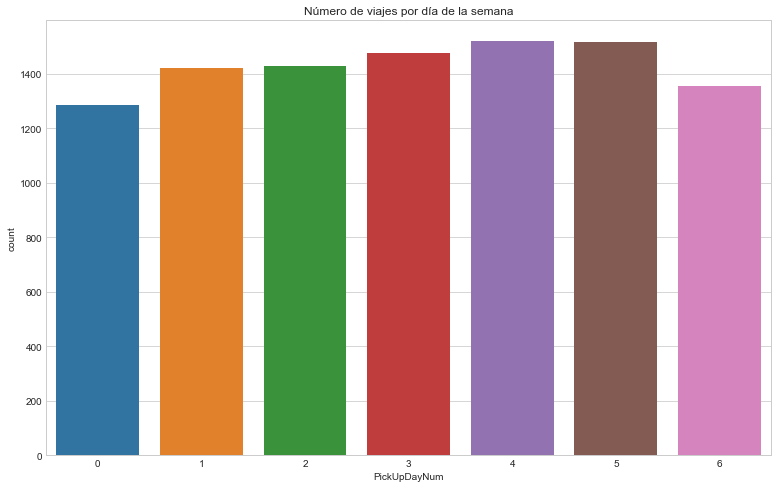

In [20]:
sns.set_style("ticks")
sns.set_style("whitegrid")
g = sns.countplot('PickUpDayNum', data=td)
g.figure.set_size_inches(13,8)
g.set_title("Número de viajes por día de la semana")

Text(0.5,1,'Listado de eficiencia por día de la semana')

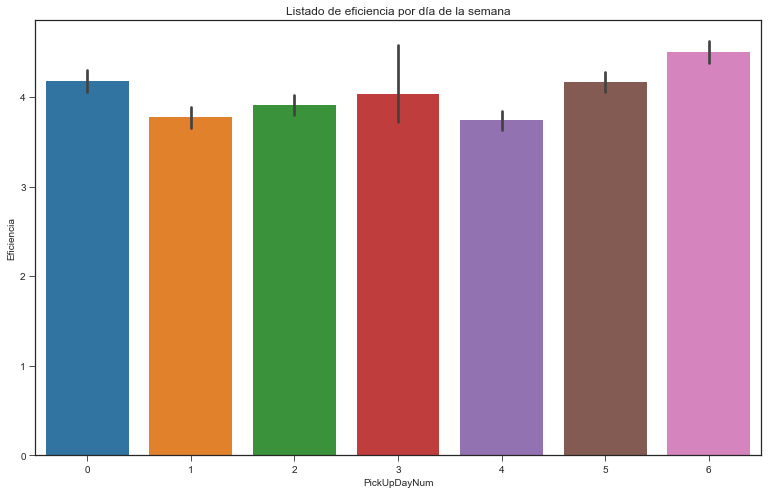

In [21]:
sns.set_style("ticks")
sns.axes_style("whitegrid")
g = sns.barplot(x="PickUpDayNum", y="Eficiencia", data=td)
g.figure.set_size_inches(13,8)
g.set_title("Listado de eficiencia por día de la semana")

Si consideramos que los viajes que mas dinero dejan son los que mas distancia se recorre en el menor tiempo, de la gráfica anterior concluimos que los mejores viajes son los días viernes, sábado y domingo.

In [32]:
from matplotlib.colors import LogNorm

(array([[  40.,   10.,   14.,    8.,   15.,   17.,   37.,   58.,   74.,
           61.,   52.,   69.,   58.,   62.,   69.,   68.,   57.,   70.,
           78.,   96.,   77.,   64.,   85.,   46.],
        [  36.,   18.,    7.,    4.,   12.,   14.,   40.,   55.,   85.,
           81.,   72.,   62.,   60.,   62.,   79.,   64.,   70.,   80.,
           98.,   85.,  100.,   79.,   92.,   65.],
        [  43.,   19.,    9.,   11.,   10.,   19.,   49.,   63.,   83.,
           70.,   56.,   64.,   61.,   77.,   74.,   57.,   66.,   72.,
           92.,   99.,   98.,  100.,   83.,   53.],
        [  37.,   27.,   15.,   13.,    8.,   14.,   36.,   66.,   76.,
           74.,   87.,   60.,   72.,   65.,   60.,   64.,   56.,   76.,
           94.,   99.,   97.,  106.,   94.,   79.],
        [  65.,   30.,   23.,   17.,   11.,   19.,   42.,   70.,   74.,
           68.,   66.,   68.,   84.,   59.,   78.,   76.,   64.,   89.,
           94.,   90.,  106.,   68.,   80.,   79.],
        [  73.,   63

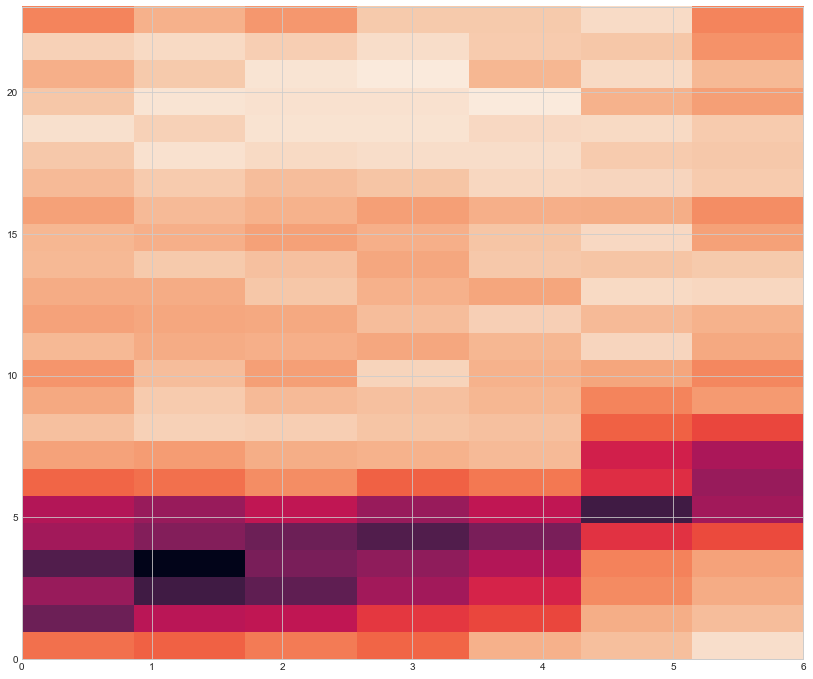

In [65]:
plt.figure(figsize=(14,12))
plt.hist2d(td['PickUpDayNum'].values, td['Hora'].values, bins=(7,24), norm = LogNorm())

La gráfica de arriba es un mapa de calor de los viajes por dia de la semana que se hacen, de acuerdo a la hora del día. (entre mas oscuro, menos viajes).

Conclusiones.

Los días martes (2) y miercoles (3) se concentra el mayor número de viajes entre 19 hrs a 21 hrs.

La mayoría de las personas no toman taxi en la mañana, por lo que podemos conluir que las personas toman el metro para asistir a su trabajo.

El Viernes es el día de mayor actividad, ya que los viajes empiezan a aumentar su frecuencia a paritir de las 11 am, continuando hasta el sábado a las 3 am.

Los peores horarios son Lunes entre 3 y 4 am y los viernes entre 5 y 6 am.

Entre semana los horarios de mayor afluencia es de las 20 hrs a las 24 hrs.

Las personas salen de fiesta el día jueve a partir de las 20 hrs a las 2 hrs del día siguiente, y el día viernes a partir de las 21 hrs a las 4 am del sábado.

otra representacion de la gráfica de arriba es:

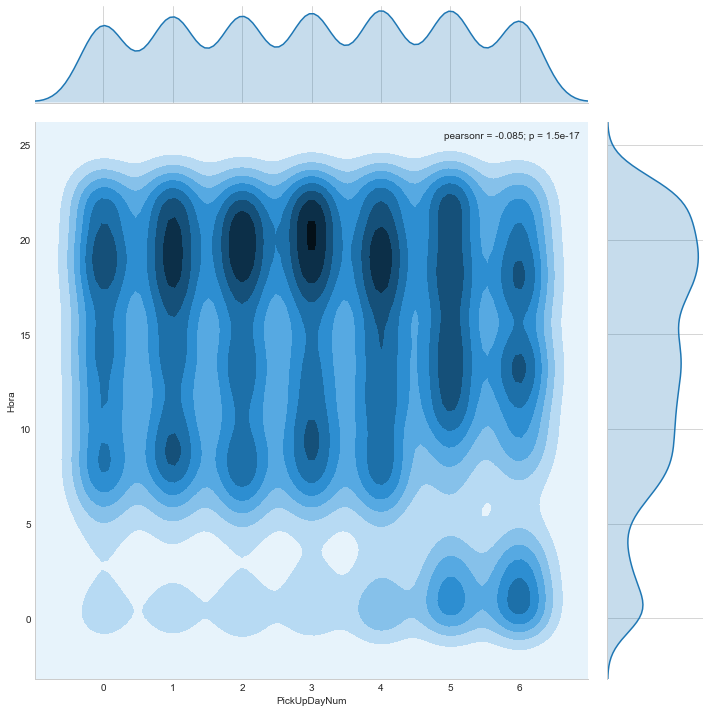

In [59]:
sns.jointplot(x="PickUpDayNum", y="Hora", data=td, kind="kde", size=10);

In [5]:
td1 = td[(td.Eficiencia <= 8)]

NameError: name 'td' is not defined

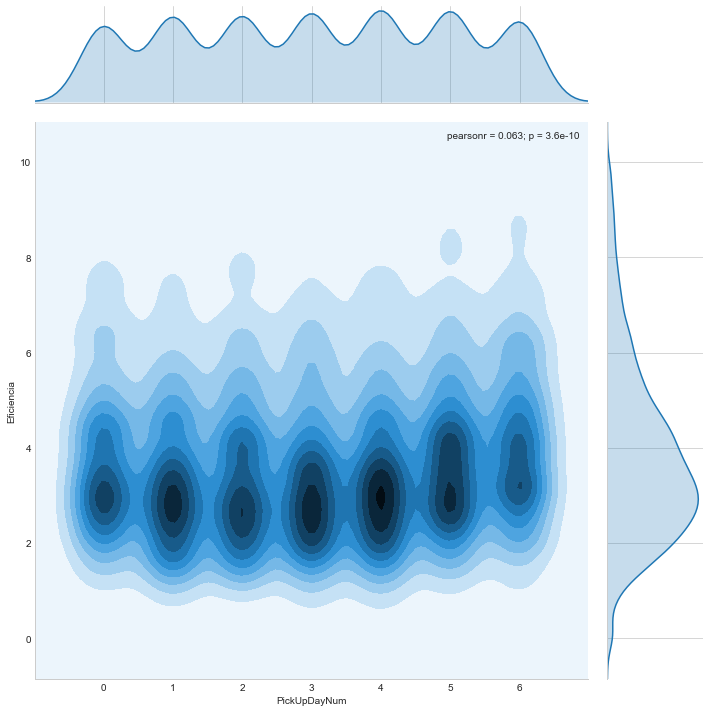

In [56]:
sns.jointplot(x="PickUpDayNum", y="Eficiencia", data=td1, kind="kde", size=10);

En la gráfica anterior se muestra la eficiencia de los viajes (distancia entre tiempo).

Podemos concluir que los viajes mas largos se realizan los viernes y sábado.

In [ ]:
sns.pairplot(x_vars="PickUpDayNum", y_vars="Hora", hue="Eficiencia", data=td, kind="kde", size=10);


Nuestro objetivo es:
    
    determinar la hora de mayor tráfico en la ciudad
    
    determinar la hora a la que se originan los viajes que salen de la isla de Manhattan
    

In [ ]:
a que hora hacer los viajes, donde esperar viajes


que es el eje de las X, 

que es el eje de las Y,

Esto es una grafica de _____ que nos da el número de vistas

extrae solo el sabado y ponlo en una linea de tiempo